<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Исследуем-целевой-признак." data-toc-modified-id="Исследуем-целевой-признак.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследуем целевой признак.</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsample" data-toc-modified-id="Downsample-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Downsample</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Исследование-метрики-AUC-ROC" data-toc-modified-id="Исследование-метрики-AUC-ROC-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Исследование метрики AUC-ROC</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.info()
display(data.head())
pd.DataFrame(data.isna().mean().round(4)*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm') # процентное соотношение пропущенных значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


,0
Tenure,9.09
Exited,0
EstimatedSalary,0
IsActiveMember,0
HasCrCard,0
NumOfProducts,0
Balance,0
Age,0
Gender,0
Geography,0


In [4]:
data['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

Видим, что типы столбцов соответствует содержанию. В столбце "Tenure" - "сколько лет человек является клиентом банка" есть 9% пропущенных значений. 
Причинами этого пропуска может быть как техническая ошибка, так и то, что этот клиент обслуживается менее 1 года в этом банке.
Так как точной причины мы не знаем, то заменим эти данные на медианные.

Также видим столбцы содержащии неприминимую в данной задачи информацию:
- RowNumber - индекс строки в данных
- CustomerId - уникальный идентификатор клиента
- Surname -  фамилия.
Эти столбцы удалим.

In [5]:
data = data.fillna(data['Tenure'].median())
pd.DataFrame(data.isna().mean().round(4)*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm') # процентное соотношение пропущенных значений

,0
Exited,0
EstimatedSalary,0
IsActiveMember,0
HasCrCard,0
NumOfProducts,0
Balance,0
Tenure,0
Age,0
Gender,0
Geography,0


Удалим ненужные нам колонки

In [6]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)

Посмотрим правильность наименования столбцов

In [7]:
print(data.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


Названия столбцов правильные.

Посмотрим наличие дубликатов:

In [8]:
data.duplicated().sum()

0

Дубликатов нет.

In [9]:
display(data.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


В столбцах Geography и Gender находятся категориальные признаки, для нашей работы они должны пригодится (думаю, что пол и регион клиента оказывает влияние на то, уйдет клиент или останется), поэтому приобразуем их в численные с помощью техники
прямого кодирования, или отображения One-Hot Encoding. И чтобы избежать дамм-ловушки будем использовать аргумент drop_first=True

In [10]:
data_ohe = pd.get_dummies(data, drop_first=True)
display(data_ohe.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Тестовой выборки в нашем случае нет, поэтому будем разбивать на три части: обучающую, валидационную и тестовую. Размеры тестового и валидационного наборов сделаем одинаковые. Исходные данные разобъем в соотношении 3:1:1.

In [11]:
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, random_state=12345, stratify=target)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345, stratify=target_valid)

Посмотрим размеры выборок

In [12]:
print('Размер тренировочной выборки:', features_train.shape[0])
print('Размер тестовой выборки:', features_valid.shape[0])
print('Размер валидной выборки:', features_test.shape[0])

Размер тренировочной выборки: 6000
Размер тестовой выборки: 2000
Размер валидной выборки: 2000


В данных присутствуют колличественные признаки с разными разбросами значений, чтобы алгорим не решил, что признаки с
большими значениями и разбросом важнее, масштабируем признаки — приводем их к одному масштабу.

Выберем столбцы, значения в которых выше 1:
- CreditScore
- Age
- Tenure
- Balance
- EstimatedSalary

In [13]:
pd.options.mode.chained_assignment = None     

Scaler_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[Scaler_columns])
features_train[Scaler_columns] = scaler.transform(features_train[Scaler_columns])
features_valid[Scaler_columns] = scaler.transform(features_valid[Scaler_columns])
features_test[Scaler_columns] = scaler.transform(features_test[Scaler_columns])   

Вывод по подготовке данных:
- прочитали файл,
- в столбце "Tenure" - "сколько лет человек является клиентом банка" обнаружиди пропущенные значения и заполнили их медианной
- обнаружили три столбца содержащие неприминимую в данной задачи информацию: 
    - RowNumber - индекс строки в данных
    - CustomerId - уникальный идентификатор клиента
    - Surname - фамилия.
  Эти столбцы удалилм.
- проверили правильность названий столбцов и наличе дубликатов
- в столбцах CreditScore, Age, Tenure, Balance и EstimatedSalary провели масштабирование используя StandardScaler()
- в столбцах Geography и Gender категориальные признаки приобразовали в численные с помощью техники прямого кодирования, или отображения One-Hot Encoding, чтобы избежать дамм-ловушки использовали аргумент drop_first=True
- разбили на обучающую, валидационную и тестовую выборки в соотношении 3:1:1

## Исследование задачи

### Исследуем целевой признак.

Чтобы оценить адекватность модели, посмотрим как часто в целевом признаке встречается класс «1» или «0». Построим график.

0    0.7963
1    0.2037
Name: Exited, dtype: float64


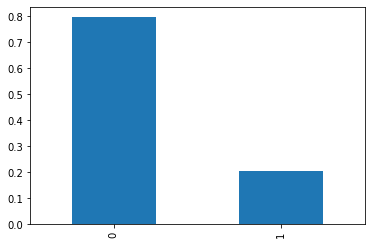

In [14]:
class_frequency = data['Exited'].value_counts(normalize= True)
print(class_frequency)
class_frequency.plot(kind='bar');

Видим, что значений с 1, то есть клиенты уходят, 20% против 80% когда остаются. Классы не сбалансированны.

### LogisticRegression

In [15]:
model = LogisticRegression(random_state=12345,solver = 'liblinear')
model.fit(features_train, target_train)
predicted_valid_lr_nobal = pd.Series(model.predict(features_valid))
print('Точность LogisticRegression:', model.score(features_valid, target_valid))
print("F1:", f1_score(predicted_valid_lr_nobal, target_valid))

Точность LogisticRegression: 0.811
F1: 0.3076923076923077


### RandomForestClassifier

Подберем лучшую модель

In [16]:
%%time

best = 0
est = 0
d = 0
auc_sc = np.array([])
f1_sc = np.array([])
for estim in range (20, 170, 3):
    for depth in range(5, 30 ,3):
        model = RandomForestClassifier(max_depth = depth, n_estimators = estim, random_state = 12345)
        model.fit(features_train, target_train)
        predicted_valid_rfnobal = model.predict(features_valid)
        forestPrediction_Proba = model.predict_proba(features_valid)[:,1]
        f1 = f1_score(target_valid, predicted_valid_rfnobal)
        f1_sc = np.append(f1_sc, f1)
        
        auc_sc = np.append(auc_sc, roc_auc_score(target_valid, forestPrediction_Proba))
        if f1 > best:
            best = f1
            est = estim
            d = depth
print('Лучшее значение f1 score RandomForest =',best,'с {} деревьями'.format(est),'и глубиной',d)
print('Точность RandomForestClassifier:', model.score(features_valid, target_valid))

Лучшее значение f1 score RandomForest = 0.6210995542347697 с 131 деревьями и глубиной 23
Точность RandomForestClassifier: 0.869
CPU times: user 6min 28s, sys: 1.27 s, total: 6min 29s
Wall time: 6min 32s


Создадим константную модель: любому объекту она прогнозирует класс «0». Сохраните её предсказания в переменной target_pred_constant.

In [17]:
target = data['Exited']
features = data.drop('Exited', axis=1)
target_pred_constant = pd.Series([0] * len(target))
print("Точность константной модели", accuracy_score(target, target_pred_constant))

Точность константной модели 0.7963


Видим, что модели, которые мы выбрали, работают лучше чем константная модель.

Вывод:
- исследовали целевой признак: получили, что значений с 1, то есть клиенты уходят, 20% против 80% когда остаются. Классы не сбалансированны.
- проверили модель LogisticRegression, получили точность LogisticRegression: 0.811,  F1: 0.3076923076923077
- проверили модель RandomForestClassifier (n_estimators=131, max_depth=23, random_state=12345), получили точность RandomForestClassifier: 0.869, F1: 0.6210995542347697. Уже при таком варианте мы достигли условие задачи.
- проверили наши модели на адекватность используя константную модель. Модели проверку прошли.

## Борьба с дисбалансом

Рассмотрим три метода:
- взвешивание классов
- upsampling
- downsample

### Взвешивание классов

In [18]:
model = LogisticRegression(random_state=12345, solver = 'liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid_lr_bal = pd.Series(model.predict(features_valid))
print('F1 LogisticRegression при балансе классов:', f1_score(target_valid, predicted_valid_lr_bal))

F1 LogisticRegression при балансе классов: 0.5289982425307558


In [19]:
model = RandomForestClassifier(n_estimators=85, max_depth=50, random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid_rfbal = model.predict(features_valid)
print('F1 RandomForestClassifier при балансе классов:',f1_score(target_valid, predicted_valid_rfbal))

F1 RandomForestClassifier при балансе классов: 0.583206106870229


Видим, что заявленного по задаче условия мы не достигли.

### Upsampling

In [20]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(target_upsampled.value_counts()) # посмотрим размер, то сбалансированы ли классы. 

1    4888
0    4778
Name: Exited, dtype: int64


Классы сбалансированы.

In [21]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('LogisticRegression')
print('F1', f1_score(target_valid, predicted_valid))
print()

LogisticRegression
F1 0.5246753246753246



Заново подберем параметры при измененении стратегии борьбы с дисбалансом классов.

In [22]:
%%time

best = 0
est = 0
d = 0
auc_sc = np.array([])
f1_sc = np.array([])
for estim in range (20, 170, 3):
    for depth in range(5, 30 ,3):
        forestModel = RandomForestClassifier(max_depth = depth,n_estimators = estim, random_state = 12345)
    
        forestModel.fit(features_upsampled, target_upsampled)
        forestPrediction = forestModel.predict(features_valid)
        forestPrediction_Proba = forestModel.predict_proba(features_valid)[:,1]
        f1 = f1_score(target_valid, forestPrediction)
        f1_sc = np.append(f1_sc, f1)
        
        auc_sc = np.append(auc_sc, roc_auc_score(target_valid, forestPrediction_Proba))
        if f1 > best:
            best = f1
            est = estim
            d = depth
print('RandomForestClassifier')
print('Лучшее значение f1 score =',best,'с {} деревьями'.format(est),'и глубиной',d)

RandomForestClassifier
Лучшее значение f1 score = 0.6467889908256881 с 59 деревьями и глубиной 11
CPU times: user 9min 20s, sys: 1.1 s, total: 9min 21s
Wall time: 9min 25s


Вывод: 
- применив Upsampling получили в LogisticRegression F1 0.5246753246753246, в RandomForestClassifier F1 0.6467889908256881.
- по условиям задания необходимо добитьмя значения f1 > 0.59 
- при условии подбора лучших параметров в случайном лесе (59 деревьев и глубина 11) получили необходимое значение (0.64).

### Downsample

In [23]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=20052020)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=20052020)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=20052020)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(target_downsampled.value_counts())   # посмотрим размер

1    1222
0    1194
Name: Exited, dtype: int64


In [24]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('F1', f1_score(target_valid, predicted_valid))
print()

Логистическая регрессия
F1 0.5156912637828669



In [25]:
%%time

best = 0
est = 0
d = 0
auc_sc = np.array([])
f1_sc = np.array([])
for estim in range (20, 170, 3):
    for depth in range(5, 30 ,3):
        forestModel = RandomForestClassifier(max_depth = depth,n_estimators = estim, random_state = 12345)
    
        forestModel.fit(features_downsampled, target_downsampled)
        forestPrediction = forestModel.predict(features_valid)
        forestPrediction_Proba = forestModel.predict_proba(features_valid)[:,1]
        f1 = f1_score(target_valid, forestPrediction)
        f1_sc = np.append(f1_sc, f1)
        auc_sc = np.append(auc_sc, roc_auc_score(target_valid, forestPrediction_Proba))
        if f1 > best:
            best = f1
            est = estim
            d = depth
print('RandomForestClassifier')
print('Лучшее значение f1 score =',best,'с {} деревьями'.format(est),'и глубиной',d)

RandomForestClassifier
Лучшее значение f1 score = 0.6285160038797284 с 38 деревьями и глубиной 8
CPU times: user 3min 32s, sys: 788 ms, total: 3min 33s
Wall time: 3min 34s


### Вывод

Вывод: провели исследование с учетом дисбаланса. 
    
Применили методы:
- Обучение модели со взвешиванием классов,
- Upsampling,
- Downsample.

Получили, что взвешивание классов не помогает добиться поставленной задачи.

При Upsampling и Downsample LogisticRegression не смогли добиться поставленной задачи: f1 > 0.59

В результате выснили, что лучше всего подходит Upsampling RandomForestClassifier:
- Upsampling f1 score для RandomForest = 0.6467889908256881 с 59 деревьями и глубиной 11 
- Downsample RandomForest = 0.6285160038797284 с 38 деревьями и глубиной 8

## Тестирование модели

In [26]:
features_tv = pd.concat([features_train, features_valid])   # соединяем train и valid
target_tv = pd.concat([target_train, target_valid])

In [27]:
model_test = RandomForestClassifier(random_state=12345, n_estimators=37, max_depth = 10, class_weight = 'balanced')
model_test.fit(features_tv, target_tv)
predicted_test = model_test.predict(features_test)
print("F1 тестовой модели:", f1_score(target_test, predicted_test))

F1 тестовой модели: 0.6139088729016786


### Исследование метрики AUC-ROC

AUC-ROC RandomForestClassifier: 0.864321608040201
AUC-ROC LogisticRegression: 0.7938066558281603
AUC-ROC RandomForestClassifier_test: 0.8396362464159074


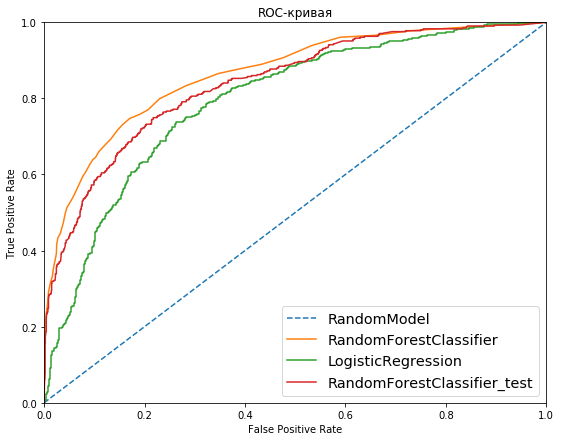

In [28]:
plt.figure(figsize=[9,7])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

model = RandomForestClassifier(random_state=12345, n_estimators=53)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier:',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression:',auc_roc)
plt.plot(fpr, tpr, label='LogisticRegression')

model = RandomForestClassifier(random_state=12345, n_estimators=35, max_depth = 15, class_weight = 'balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid)
auc_roc = roc_auc_score(target_test, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier_test:',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier_test')

plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(loc='lower right', fontsize='x-large')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")
plt.show()

На графике видим:
- все наши модели лучше рандомной
- худшие значения показывает лигистическая регрессия
- значения RandomForestClassifier и RandomForestClassifier_test близки

## Общий вывод

В ходе решения данной задачи работали с данными о клиентах банках и об их уходе из данного банка. Необходимо было достигнуть f1 > 0.59.

Для этого были выполнены следующие шаги:
- чтение и подготовка данных, обнаружили в исходных данных, что:
    - в столбце "Tenure" ("сколько лет человек является клиентом банка") есть пропущенные значения и заполнили их медианной;
    - есть три столбца содержащие неприминимую в данной задачи информацию (индекс строки в данных, уникальный идентификатор клиента, фамилия), удалили их;
    - в столбцах CreditScore, Age, Tenure, Balance и EstimatedSalary необходимо провести масштабирование, сделали применив  StandardScaler();
    - в столбцах Geography и Gender есть категориальные признаки, приобразовали их в численные с помощью техники прямого кодирования, или отображения One-Hot Encoding, чтобы избежать дамм-ловушки использовали аргумент drop_first=True
    - разбили на обучающую, валидационную и тестовую выборки в соотношении 3:1:1
- исследование задачи:
    - исследовали целевой признак: получили, что значений с 1, то есть клиенты уходят, 20% против 80% когда остаются. Выяснили, что классы не сбалансированны.
    - проверили модель LogisticRegression, получили точность LogisticRegression: 0.811, F1: 0.3076923076923077
    - проверили модель RandomForestClassifier (n_estimators=131, max_depth=23, random_state=12345), получили точность RandomForestClassifier: 0.869, F1: 0.6210995542347697. Уже при таком варианте мы достигли условие задачи.
    - проверили наши модели на адекватность используя константную модель. Модели проверку прошли.
- борьба с дисбалансом:
    - рассмотрели такие методы борьбы с дисбалансом: 
        - обучение модели со взвешиванием классов (выяснили, что это метод не помогает достичь заданной задачи)
        - Upsampling,
        - Downsample.
- проверили на тестовой выборке и получили f1 0.6139088729016786
- исследовали метрики AUC_ROC.

При Upsampling и Downsample LogisticRegression не смогли добиться поставленной задачи: f1 > 0.59

В результате выснили, что лучше всего подходит Upsampling RandomForestClassifier:
Upsampling f1 score для RandomForest = 0.6467889908256881 с 59 деревьями и глубиной 11
Downsample f1 score для RandomForest = 0.6285160038797284 с 38 деревьями и глубиной 8

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [X]  Ячейки с кодом расположены в порядке исполнения
- [X]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*